In [3]:
from google.colab import files
uploaded = files.upload()

Saving amazon.csv to amazon.csv


In [4]:
#1.What is the average rating for each product category?
import pandas as pd

# Load the dataset
df = pd.read_csv("amazon.csv")
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")


# Group by product category and calculate the average rating
average_ratings = df.groupby("category")["rating"].mean()

# Display the results
print(average_ratings)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

In [11]:
#2.What are the top rating_count products by category?

import pandas as pd

# Load the dataset
df = pd.read_csv("amazon.csv")

# Ensure the 'Rating Count' column is numeric
df["rating_count"] = pd.to_numeric(df["rating_count"], errors="coerce")

# Group by product category and find the top-rated products
top_products = df.groupby("category").apply(lambda x: x.nlargest(1, "rating_count"))

# Display the results
print(top_products[["category", "product_name", "rating_count"]])

                                                                                                  category  \
category                                                                                                     
Car&Motorbike|CarAccessories|InteriorAccessorie... 1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
Computers&Accessories|Accessories&Peripherals|A... 695   Computers&Accessories|Accessories&Peripherals|...   
Computers&Accessories|Accessories&Peripherals|A... 906   Computers&Accessories|Accessories&Peripherals|...   
Computers&Accessories|Accessories&Peripherals|A... 748   Computers&Accessories|Accessories&Peripherals|...   
Computers&Accessories|Accessories&Peripherals|A... 844   Computers&Accessories|Accessories&Peripherals|...   
...                                                                                                    ...   
OfficeProducts|OfficePaperProducts|Paper|Statio... 616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
OfficeProd

<ipython-input-11-bd00257b97e9>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products = df.groupby("category").apply(lambda x: x.nlargest(1, "rating_count"))


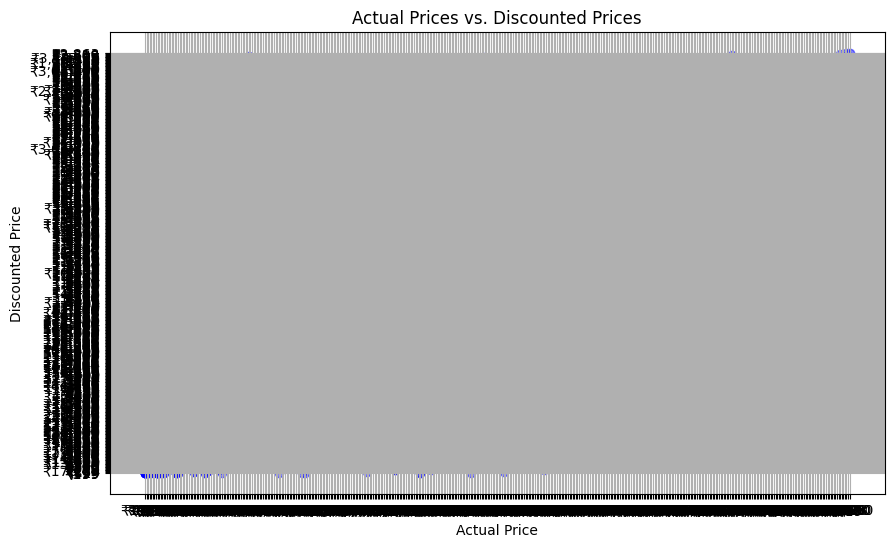

In [16]:
#3.What is the distribution of discounted prices vs. actual prices?
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("amazon.csv")

# Scatter plot to compare actual vs. discounted prices
plt.figure(figsize=(10, 6))
plt.scatter(df["actual_price"], df["discounted_price"], alpha=0.5, color="blue")
plt.xlabel("Actual Price")
plt.ylabel("Discounted Price")
plt.title("Actual Prices vs. Discounted Prices")
plt.grid(True)
plt.show()

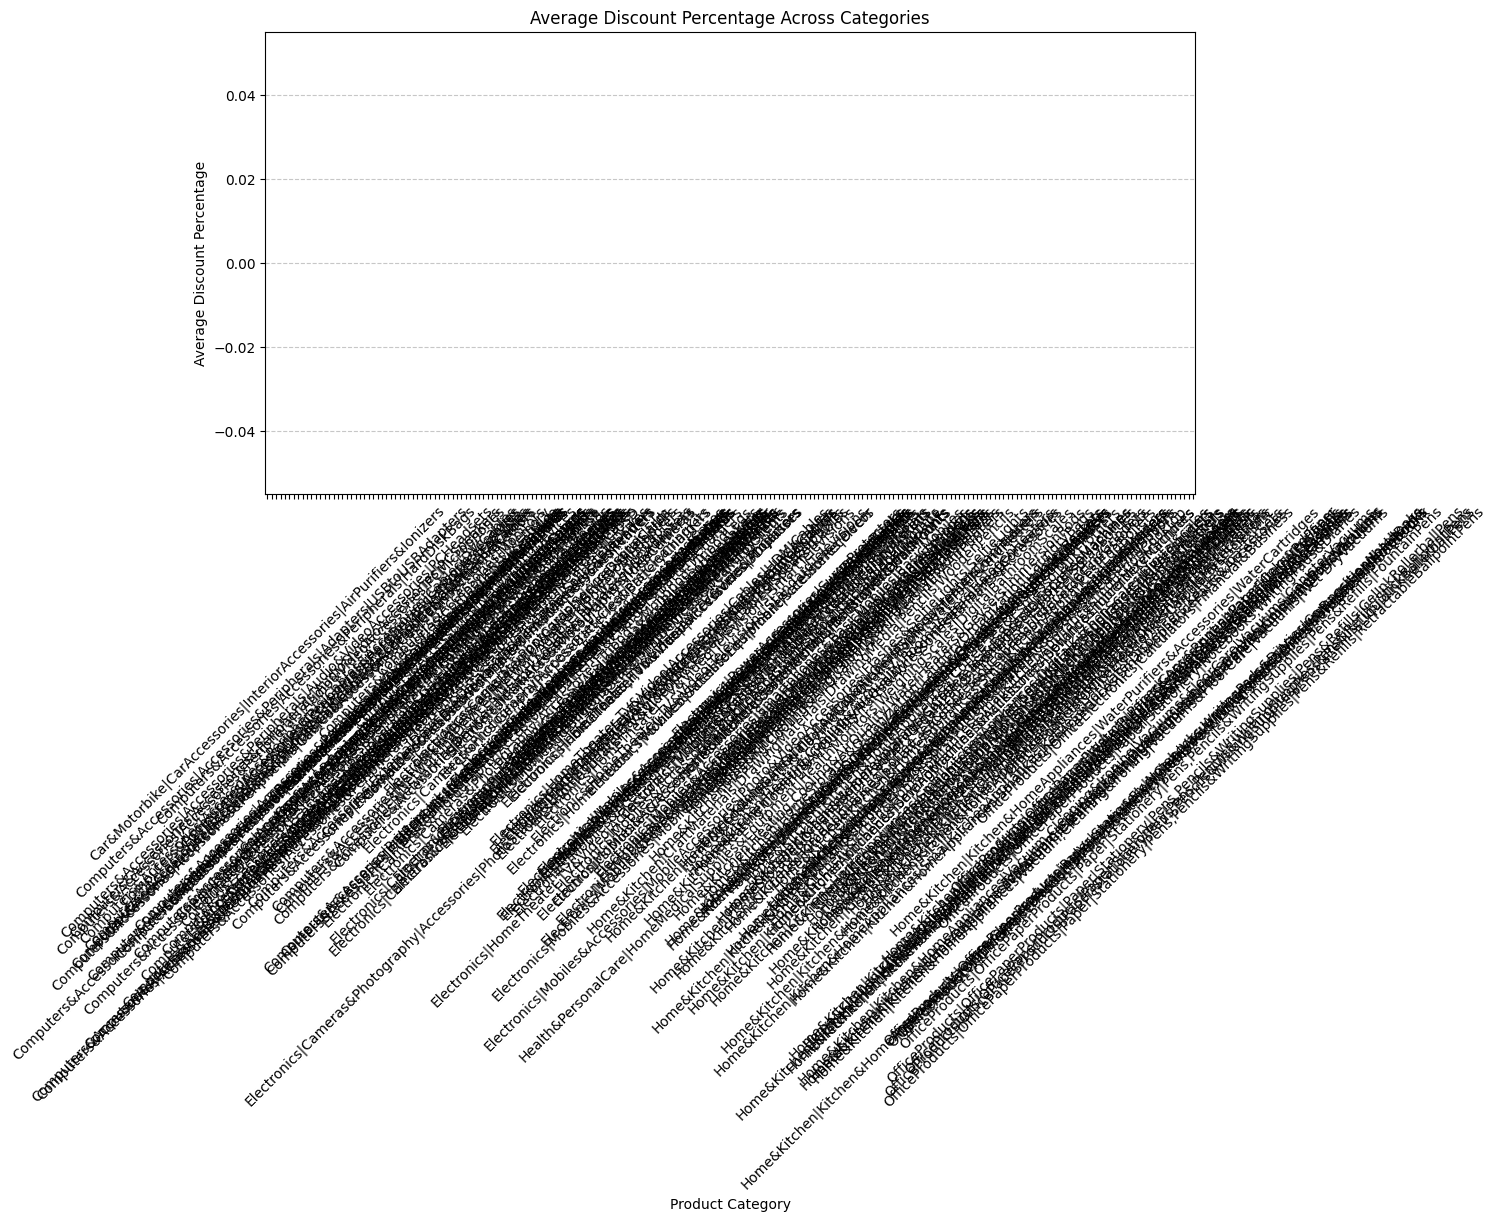

In [19]:
#4.How does the average discount percentage vary across categories?

df["discount_percentage"] = pd.to_numeric(df["discount_percentage"], errors="coerce")

# Group by product category and compute average discount percentage
category_discounts = df.groupby("category")["discount_percentage"].mean()

# Plot discount percentage across categories
plt.figure(figsize=(12, 6))
category_discounts.sort_values().plot(kind="bar", color="skyblue")
plt.xlabel("Product Category")
plt.ylabel("Average Discount Percentage")
plt.title("Average Discount Percentage Across Categories")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [20]:
#5.What are the most popular product names?
# Ensure the 'Rating Count' column is numeric
df["rating_count"] = pd.to_numeric(df["rating_count"], errors="coerce")

# Find the top products based on rating count
top_products = df.nlargest(10, "rating_count")[["product_name", "rating_count"]]

# Display the results
print(top_products)

                                           product_name  rating_count
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...         992.0
750        Eveready Red 1012 AAA Batteries - Pack of 10         989.0
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...         976.0
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0
151   Zoul USB Type C Fast Charging 3A Nylon Braided...         974.0
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0
1272  Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...         959.0
1259  Hindware Atlantic Xceed 5L 3kW Instant Water H...         942.0
214   Crypo™ Universal Remote Compatible with Tata S...         928.0
1262  iBELL Castor CTEK15L Premium 1.5 Litre Stainle...         925.0


In [21]:
#6.What are the most popular product keywords?
from collections import Counter
import re

# Extract product names
product_names = df["product_name"].dropna().astype(str)

# Tokenize words and clean them
words = [word.lower() for name in product_names for word in re.findall(r'\b\w+\b', name)]

# Count word frequencies
word_counts = Counter(words)

# Display the top 10 most common keywords
print(word_counts.most_common(10))


[('with', 752), ('for', 674), ('black', 530), ('usb', 417), ('cable', 414), ('1', 413), ('and', 331), ('c', 289), ('3', 275), ('2', 267)]


In [22]:
#7.What are the most popular product reviews?
# Ensure ratings and rating count columns are numeric
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["rating_count"] = pd.to_numeric(df["rating_count"], errors="coerce")

# Find the top reviews based on rating and rating count
top_reviews = df.sort_values(["rating", "rating_count"], ascending=[False, False])[
    ["review_title", "product_name", "rating", "rating_count"]
].head(10)

# Display the results
print(top_reviews)

                                           review_title  \
775   Very responsive and stylish mouse,Simply Aweso...   
174   Good,Superb quality,Good products  nice one,Wo...   
324                                     Awesome Product   
1201  Oratech Best Coffee Frother,Great,My review ab...   
1145  Best Product,It’s expansive but it works well ...   
1299  Loved it,Good product,Good product,It's easy t...   
1226  Little kitchen helper,An amazing product,Very ...   
249   Product installation was excellent  but delive...   
459   Easy to install,Best screen guard and the easi...   
1223  Nice product,Not as effective as claimed, just...   

                                           product_name  rating  rating_count  
775   Amazon Basics Wireless Mouse | 2.4 GHz Connect...     5.0          23.0  
174   Syncwire LTG to USB Cable for Fast Charging Co...     5.0           5.0  
324   REDTECH USB-C to Lightning Cable 3.3FT, [Apple...     5.0           NaN  
1201  Oratech Coffee Frother e

In [9]:
#8.What is the correlation between discounted_price and rating?
df["discounted_price"] = pd.to_numeric(df["discounted_price"], errors= 'coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
# Calculate correlation
correlation = df["discounted_price"].corr(df["rating"])

print(f"Correlation between Discounted Price and Rating: {correlation:.4f}")


Correlation between Discounted Price and Rating: nan


In [5]:
#9.What are the Top 5 categories based on the highest ratings?
# Ensure the 'Rating' column is numeric
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

# Group by product category and compute the average rating
category_ratings = df.groupby("category")["rating"].mean()

# Get the Top 5 highest-rated categories
top_categories = category_ratings.sort_values(ascending=False).head(5)

# Display the results
print(top_categories)


category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [ ]:
#10.Identify any potential areas for improvement or optimization based on the data analysis.
#
